In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-bios/bios (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/dataset-bios/bios (1).csv')

In [4]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina•Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)",NaN,NaN,NaN,NaN,NaN,NaN
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya•Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",NaN,NaN,NaN,NaN,Валерия Сергеевна•Меркушева,NaN
145497,Competed in Olympic Games,Female,Yuliya•Smirnova,Yuliya•Smirnova,"8 May 1998 in Kotlas, Arkhangelsk (RUS)",NaN,ROC,149224,163 cm / 55 kg,"Agidel, Ufa (RUS)",NaN,NaN,NaN,NaN,Юлия•Смирнова,NaN
145498,Competed in Olympic Games,Male,André•Foussard,André•Foussard,"19 May 1899 in Niort, Deux-Sèvres (FRA)","18 March 1986 in Niort, Deux-Sèvres (FRA)",France,149225,166 cm,"Beauvoisine FC, Rouen (FRA)",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC',
       'athlete_id', 'Measurements', 'Affiliations', 'Nick/petnames',
       'Title(s)', 'Other names', 'Nationality', 'Original name',
       'Name order'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Roles          145500 non-null  object
 1   Sex            145500 non-null  object
 2   Full name      145500 non-null  object
 3   Used name      145500 non-null  object
 4   Born           143772 non-null  object
 5   Died           34042 non-null   object
 6   NOC            145499 non-null  object
 7   athlete_id     145500 non-null  int64 
 8   Measurements   107833 non-null  object
 9   Affiliations   95832 non-null   object
 10  Nick/petnames  9145 non-null    object
 11  Title(s)       399 non-null     object
 12  Other names    7167 non-null    object
 13  Nationality    8259 non-null    object
 14  Original name  30739 non-null   object
 15  Name order     7844 non-null    object
dtypes: int64(1), object(15)
memory usage: 17.8+ MB


In [7]:
df.describe()

,athlete_id
count,145500.000000
mean,73686.188955
std,42868.960158
min,1.000000
25%,36663.750000
50%,73302.500000
75%,110306.250000
max,149814.000000


In [8]:
df.isna().sum()

Roles                 0
Sex                   0
Full name             0
Used name             0
Born               1728
Died             111458
NOC                   1
athlete_id            0
Measurements      37667
Affiliations      49668
Nick/petnames    136355
Title(s)         145101
Other names      138333
Nationality      137241
Original name    114761
Name order       137656
dtype: int64

In [9]:
df.shape

(145500, 16)

In [10]:
(df.isna().sum().sum())/(df.shape[0]*df.shape[1])

0.43383548109965636

In [11]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['NOC'].unique()

array(['France', 'Great Britain', 'Germany West Germany', 'West Germany',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Haiti',
       'Hong Kong, China', 'Hungary', 'Turkmenistan', 'Indonesia',
       'Austria', 'Indonesia Netherlands', 'India', 'Argentina',
       'Australia', 'Belgium', 'Bhutan', 'Belarus', 'Brazil', 'Bulgaria',
       'Canada', "People's Republic of China", 'Colombia', 'Costa Rica',
       'Cyprus', 'Denmark', 'Spain', 'Estonia', 'Finland',
       'Georgia Unified Team United States', 'Guam', 'Armenia',
       'The Bahamas', 'Bermuda', 'Bosnia and Herzegovina',
       'Belarus Soviet Union Unified Team', 'Bohemia',
       'Bohemia Czechoslovakia', 'Bulgaria Greece',
       'Canada Hong Kong, China', 'Chile',
       "Chinese Taipei People's Republic of China",
       "People's Republic of China United States",
       'Islamic Republic of Iran', 'Ireland', 'Iraq', 'Iceland', 'Israel',
       'Italy Soviet Union', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Re

In [13]:
len(df['NOC'].unique())

697

In [14]:
df['NOC'].value_counts()

NOC
United States                 10114
Great Britain                  6421
France                         6339
Canada                         5276
Italy                          5189
                              ...  
Azerbaijan North Macedonia        1
Armenia Bulgaria                  1
Armenia Kazakhstan                1
Australia Soviet Union            1
Austria Czechia                   1
Name: count, Length: 696, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Roles          145500 non-null  object
 1   Sex            145500 non-null  object
 2   Full name      145500 non-null  object
 3   Used name      145500 non-null  object
 4   Born           143772 non-null  object
 5   Died           34042 non-null   object
 6   NOC            145499 non-null  object
 7   athlete_id     145500 non-null  int64 
 8   Measurements   107833 non-null  object
 9   Affiliations   95832 non-null   object
 10  Nick/petnames  9145 non-null    object
 11  Title(s)       399 non-null     object
 12  Other names    7167 non-null    object
 13  Nationality    8259 non-null    object
 14  Original name  30739 non-null   object
 15  Name order     7844 non-null    object
dtypes: int64(1), object(15)
memory usage: 17.8+ MB


In [16]:
len(df[df['Sex']=='Male'])

106325

In [17]:
len(df[df['Sex']=='Female'])

39175

In [18]:
len(df)

145500

In [19]:
106325+39175

145500

In [20]:
(106325/145500)*100

73.07560137457044

73.07% are men

Usually men participate more than women

In [21]:
ls

In [22]:
sex_counts=df['Sex'].value_counts()

In [23]:
labels=df['Sex'].value_counts().index

In [24]:
labels

Index(['Male', 'Female'], dtype='object', name='Sex')

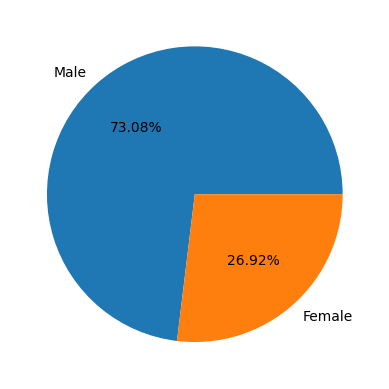

In [25]:
plt.pie(sex_counts,labels=labels,autopct='%1.2f%%')
plt.show()

In [26]:
df.head(1)

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['Nationality'].unique()

array([nan, 'Ireland', 'Great Britain', 'Belarus', 'Czechia',
       'Uzbekistan', 'Latvia', 'Tajikistan', 'Republic of Moldova',
       'Ukraine', 'Slovakia', 'Russian Federation', 'Georgia', 'Estonia',
       'Croatia', 'Slovenia', 'Azerbaijan', 'United States',
       'France United States', 'Serbia', 'Bosnia and Herzegovina',
       'Algeria', 'Tunisia', 'Senegal', 'Lithuania',
       'Saint Kitts and Nevis', 'Saint Lucia', 'East Germany',
       'West Germany', 'Republic of Korea', 'Singapore', 'Kazakhstan',
       'North Macedonia', 'Armenia', 'Lithuania Soviet Union',
       'Montenegro', 'Kosovo', 'East Germany West Germany', 'Australia',
       'Kyrgyzstan', 'Eritrea', 'Trinidad and Tobago', 'Argentina',
       'Haiti', 'France', 'Greece', 'Germany', 'Norway', 'Spain',
       'Falkland Islands', 'Great Britain Mixed team', 'South Africa',
       'Austria', 'Aruba', 'Netherlands', 'Hong Kong, China', 'Hungary',
       'Poland', 'Sweden', 'Serbia Yugoslavia', 'Switzerland',
    

In [28]:
df['Nationality'].value_counts()

Nationality
Russian Federation          2104
Czechia                     1710
West Germany                 714
Serbia                       471
Ukraine                      468
                            ... 
Japan                          1
Cuba                           1
Saint Kitts and Nevis          1
Russian Federation Spain       1
Nigeria                        1
Name: count, Length: 94, dtype: int64

In [29]:
len(df[df['Nationality'].isnull()])

137241

In [30]:
df[df['Nationality'].isnull()]

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina•Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)",NaN,NaN,NaN,NaN,NaN,NaN
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya•Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",NaN,NaN,NaN,NaN,Валерия Сергеевна•Меркушева,NaN
145497,Competed in Olympic Games,Female,Yuliya•Smirnova,Yuliya•Smirnova,"8 May 1998 in Kotlas, Arkhangelsk (RUS)",NaN,ROC,149224,163 cm / 55 kg,"Agidel, Ufa (RUS)",NaN,NaN,NaN,NaN,Юлия•Смирнова,NaN
145498,Competed in Olympic Games,Male,André•Foussard,André•Foussard,"19 May 1899 in Niort, Deux-Sèvres (FRA)","18 March 1986 in Niort, Deux-Sèvres (FRA)",France,149225,166 cm,"Beauvoisine FC, Rouen (FRA)",NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape[0]

145500

In [32]:
df[df['Nationality']=='Ireland']

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
78,Competed in Olympic Games,Male,John Mary Pius•Boland,John Pius•Boland,"16 September 1870 in Dublin, Dublin (IRL)","17 March 1958 in Westminster, England (GBR)",Great Britain,79,NaN,"University of Oxford, Oxford (GBR)",NaN,NaN,NaN,Ireland,NaN,NaN
105,Competed in Olympic Games,Male,Harold Segerson•Mahony,Harold•Mahony,"13 February 1867 in Edinburgh, Scotland (GBR)","27 June 1905 in between Glencar and Killorgin,...",Great Britain,106,191 cm,"Fitzwilliam Lawn Tennis Club, Dublin (IRL)",NaN,NaN,NaN,Ireland,NaN,NaN
109,Competed in Olympic Games,Male,James Cecil•Parke,James•Parke,"26 July 1881 in Clones, Monaghan (IRL)","27 February 1946 in Llandudno, Wales (GBR)",Great Britain,110,NaN,NaN,NaN,NaN,NaN,Ireland,NaN,NaN
542,Competed in Olympic Games,Female,"Beatrice Geraldine•Hill-Lowe (Ruxton-, -Thompson)",Beatrice•Hill-Lowe,"26 January 1868 in Ardee, Louth (IRL)","2 July 1951 in Tenby, Wales (GBR)",Great Britain,544,NaN,"Archers of the Teme, Ludlow (GBR)",NaN,NaN,NaN,Ireland,NaN,NaN
14099,Competed in Olympic Games,Male,Bernard Joseph•Doyle,Bernard•Doyle,"9 April 1888 in Campile, Wexford (IRL)","21 December 1977 in Rathgar, Dublin (IRL)",Great Britain,14192,NaN,"Irish Road Club, Dublin (IRL)",NaN,NaN,NaN,Ireland,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68930,Competed in Olympic Games,Male,"Patrick Joseph ""Paddy""•Roche",Paddy•Roche,"1886 in Cork, Cork (IRL)","25 August 1917 in Baghdad, Baghdad (IRQ)",Great Britain,69447,NaN,"Knockrea Athletic Club, IRL / Queens College, ...",NaN,NaN,NaN,Ireland,NaN,NaN
69100,Competed in Olympic Games,Male,Hedges Eyre•Worthington-Eyre,Hedges•Worthington-Eyre,"8 September 1899 in Kingston, Dún Laoghaire, D...","22 October 1979 in London, England (GBR)",Great Britain,69618,NaN,"Dublin University Athletic Club, Dublin (IRL)",NaN,NaN,NaN,Ireland,NaN,NaN
79026,Competed in Intercalated Games • Non-starter,Male,Peter•O'Connor,Peter•O'Connor,"24 October 1872 in Millom, England (GBR)","9 November 1957 in Upton, Waterford (IRL)",Great Britain,79617,186 cm / 66 kg,"Amateur Athletic Association, IRL",NaN,NaN,NaN,Ireland,NaN,NaN
79810,Competed in Olympic Games,Male,"John William ""Jack""•Peterson",Jack•Peterson,"22 February 1880 in Dublin, Dublin (IRL)","23 May 1964 in Dublin, Dublin (IRL)",Great Britain,80454,NaN,"Monkstown H.C., Dublin (IRL)",NaN,NaN,NaN,Ireland,NaN,NaN


In [33]:
df['Nationality'].value_counts().sort_values()

Nationality
Nigeria                  1
Haiti                    1
Colombia                 1
Morocco                  1
Israel                   1
                      ... 
Ukraine                468
Serbia                 471
West Germany           714
Czechia               1710
Russian Federation    2104
Name: count, Length: 94, dtype: int64

In [34]:
df.isna().sum()

Roles                 0
Sex                   0
Full name             0
Used name             0
Born               1728
Died             111458
NOC                   1
athlete_id            0
Measurements      37667
Affiliations      49668
Nick/petnames    136355
Title(s)         145101
Other names      138333
Nationality      137241
Original name    114761
Name order       137656
dtype: int64

In [35]:
df['Nationality'].isna().sum()/df.shape[0]

0.9432371134020618

In [36]:
df['Other names'].isna().sum()/df.shape[0]

0.9507422680412371

In [37]:
df['Name order'].isna().sum()/df.shape[0]

0.9460893470790378

In [38]:
df.isna().sum()/df.shape[0]

Roles            0.000000
Sex              0.000000
Full name        0.000000
Used name        0.000000
Born             0.011876
Died             0.766034
NOC              0.000007
athlete_id       0.000000
Measurements     0.258880
Affiliations     0.341361
Nick/petnames    0.937148
Title(s)         0.997258
Other names      0.950742
Nationality      0.943237
Original name    0.788735
Name order       0.946089
dtype: float64

In [39]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.columns

Index(['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC',
       'athlete_id', 'Measurements', 'Affiliations', 'Nick/petnames',
       'Title(s)', 'Other names', 'Nationality', 'Original name',
       'Name order'],
      dtype='object')

In [41]:
df.drop(columns=['Nick/petnames',
       'Title(s)', 'Other names', 'Nationality', 'Original name',
       'Name order'],inplace=True)

In [42]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)"
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)"
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)"
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)"
...,...,...,...,...,...,...,...,...,...,...
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina•Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)"
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya•Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)"
145497,Competed in Olympic Games,Female,Yuliya•Smirnova,Yuliya•Smirnova,"8 May 1998 in Kotlas, Arkhangelsk (RUS)",NaN,ROC,149224,163 cm / 55 kg,"Agidel, Ufa (RUS)"
145498,Competed in Olympic Games,Male,André•Foussard,André•Foussard,"19 May 1899 in Niort, Deux-Sèvres (FRA)","18 March 1986 in Niort, Deux-Sèvres (FRA)",France,149225,166 cm,"Beauvoisine FC, Rouen (FRA)"


In [43]:
df[['DOB','Place']]=df['Born'].str.split('in',expand=True,n=1)

In [44]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)"
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)"
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)"
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)"
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)"
...,...,...,...,...,...,...,...,...,...,...,...,...
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina•Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)",30 January 2002,"Serov, Sverdlovsk (RUS)"
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya•Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",20 September 1999,"Moskva (Moscow), Moskva (RUS)"
145497,Competed in Olympic Games,Female,Yuliya•Smirnova,Yuliya•Smirnova,"8 May 1998 in Kotlas, Arkhangelsk (RUS)",NaN,ROC,149224,163 cm / 55 kg,"Agidel, Ufa (RUS)",8 May 1998,"Kotlas, Arkhangelsk (RUS)"
145498,Competed in Olympic Games,Male,André•Foussard,André•Foussard,"19 May 1899 in Niort, Deux-Sèvres (FRA)","18 March 1986 in Niort, Deux-Sèvres (FRA)",France,149225,166 cm,"Beauvoisine FC, Rouen (FRA)",19 May 1899,"Niort, Deux-Sèvres (FRA)"


In [45]:
df['DOB1']=pd.to_datetime(df['DOB'])

ValueError: time data "1876 " doesn't match format "%d %B %Y ", at position 91. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [49]:
df.iloc[91]

Roles                             Competed in Olympic Games
Sex                                                    Male
Full name                             Lionel Hunter•Escombe
Used name                                    Lionel•Escombe
Born                     1876 in Natal, KwaZulu-Natal (RSA)
Died            15 October 1914 in Brentford, England (GBR)
NOC                                           Great Britain
athlete_id                                               92
Measurements                                            NaN
Affiliations                                            NaN
DOB                                                   1876 
Place                            Natal, KwaZulu-Natal (RSA)
Name: 91, dtype: object

In [50]:
df['DOB1'] = pd.to_datetime(df['DOB'], format='mixed', dayfirst=True, errors='coerce')


In [52]:
df['DOB1'].isna().sum()

1878

In [59]:
df['DOB1'].dtype

dtype('<M8[ns]')

In [60]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17


In [61]:
df['Measurements'].isna().sum()

37667

In [62]:
df[['Height','Weight']]=df['Measurements'].str.split("/",expand=True,n=1)

In [63]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height,Weight
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN


In [65]:
df[df['DOB1'].isna() & df['Height'].isna() & df['Weight'].isna()].shape[0]

1735

In [67]:
rows_to_drop = df[df['DOB1'].isna() & df['Height'].isna() & df['Weight'].isna()].index


In [69]:
df.drop(index=rows_to_drop,inplace=True)

In [70]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height,Weight
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina•Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)",30 January 2002,"Serov, Sverdlovsk (RUS)",2002-01-30,167 cm,61 kg
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya•Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",20 September 1999,"Moskva (Moscow), Moskva (RUS)",1999-09-20,168 cm,65 kg
145497,Competed in Olympic Games,Female,Yuliya•Smirnova,Yuliya•Smirnova,"8 May 1998 in Kotlas, Arkhangelsk (RUS)",NaN,ROC,149224,163 cm / 55 kg,"Agidel, Ufa (RUS)",8 May 1998,"Kotlas, Arkhangelsk (RUS)",1998-05-08,163 cm,55 kg
145498,Competed in Olympic Games,Male,André•Foussard,André•Foussard,"19 May 1899 in Niort, Deux-Sèvres (FRA)","18 March 1986 in Niort, Deux-Sèvres (FRA)",France,149225,166 cm,"Beauvoisine FC, Rouen (FRA)",19 May 1899,"Niort, Deux-Sèvres (FRA)",1899-05-19,166 cm,None


In [71]:
df[df['DOB1'].isna() & df['Height'].isna() & df['Weight'].isna()].shape[0]

0

In [72]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height,Weight
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina•Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)",30 January 2002,"Serov, Sverdlovsk (RUS)",2002-01-30,167 cm,61 kg
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya•Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",20 September 1999,"Moskva (Moscow), Moskva (RUS)",1999-09-20,168 cm,65 kg
145497,Competed in Olympic Games,Female,Yuliya•Smirnova,Yuliya•Smirnova,"8 May 1998 in Kotlas, Arkhangelsk (RUS)",NaN,ROC,149224,163 cm / 55 kg,"Agidel, Ufa (RUS)",8 May 1998,"Kotlas, Arkhangelsk (RUS)",1998-05-08,163 cm,55 kg
145498,Competed in Olympic Games,Male,André•Foussard,André•Foussard,"19 May 1899 in Niort, Deux-Sèvres (FRA)","18 March 1986 in Niort, Deux-Sèvres (FRA)",France,149225,166 cm,"Beauvoisine FC, Rouen (FRA)",19 May 1899,"Niort, Deux-Sèvres (FRA)",1899-05-19,166 cm,None


In [73]:
df[['death_date','place of death']]=df['Died'].str.split("in",expand=True,n=1)

In [74]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height,Weight,death_date,place of death
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)"
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)"
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg,20 March 1978,"Monaco, Monaco (MON)"
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)"


In [75]:
df['Death_date']=pd.to_datetime(df['death_date'],format='mixed',dayfirst=True,errors='coerce')

In [76]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height,Weight,death_date,place of death,Death_date
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",1960-10-02
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg,NaN,NaN,NaT
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg,20 March 1978,"Monaco, Monaco (MON)",1978-03-20
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)",1930-07-25


In [78]:
df['Death_date'].isna().sum()

110062

In [81]:
df['Used name'] = df['Used name'].str.replace('•', ' ', regex=False)

'''
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Used name': ['John • Doe', 'Jane • Smith', 'Alice • Johnson']
})

# Replacing multiple characters
replacements = {'•': ' ', 'OldChar': 'NewChar'}

# Apply each replacement
for old_char, new_char in replacements.items():
    df['Used name'] = df['Used name'].str.replace(old_char, new_char, regex=False)

print(df)

'''

"\nimport pandas as pd\n\n# Sample DataFrame\ndf = pd.DataFrame({\n    'Used name': ['John • Doe', 'Jane • Smith', 'Alice • Johnson']\n})\n\n# Replacing multiple characters\nreplacements = {'•': ' ', 'OldChar': 'NewChar'}\n\n# Apply each replacement\nfor old_char, new_char in replacements.items():\n    df['Used name'] = df['Used name'].str.replace(old_char, new_char, regex=False)\n\nprint(df)\n\n"

In [82]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height,Weight,death_date,place of death,Death_date
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",1960-10-02
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg,NaN,NaN,NaT
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg,20 March 1978,"Monaco, Monaco (MON)",1978-03-20
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)",1930-07-25


In [83]:
df = df.rename(columns={'Height': 'Height_cm'})

In [84]:
df=df.rename(columns={'Weight':'Weight_kg'})

In [85]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,Weight_kg,death_date,place of death,Death_date
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",1960-10-02
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg,NaN,NaN,NaT
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg,20 March 1978,"Monaco, Monaco (MON)",1978-03-20
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)",1930-07-25


In [90]:
df[['Height_cm1','cmm']]=df['Height_cm'].str.split(" ",expand=True)# last mein bhi space hoga isliye ye drama kar rha h

ValueError: Columns must be same length as key

In [91]:
df[['Height_cm1', 'cmm']] = df['Height_cm'].str.split(" ", expand=True,n=1)

In [92]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,Weight_kg,death_date,place of death,Death_date,Height_cm1,cmm
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",1960-10-02,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg,NaN,NaN,NaT,183,cm
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183,cm
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168,cm
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)",1930-07-25,NaN,NaN


In [93]:
df.drop(columns=['cmm'],inplace=True)

In [94]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,Weight_kg,death_date,place of death,Death_date,Height_cm1
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",1960-10-02,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg,NaN,NaN,NaT,183
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)",1930-07-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)",30 January 2002,"Serov, Sverdlovsk (RUS)",2002-01-30,167 cm,61 kg,NaN,NaN,NaT,167
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",20 September 1999,"Moskva (Moscow), Moskva (RUS)",1999-09-20,168 cm,65 kg,NaN,NaN,NaT,168
145497,Competed in Olympic Games,Female,Yuliya•Smirnova,Yuliya Smirnova,"8 May 1998 in Kotlas, Arkhangelsk (RUS)",NaN,ROC,149224,163 cm / 55 kg,"Agidel, Ufa (RUS)",8 May 1998,"Kotlas, Arkhangelsk (RUS)",1998-05-08,163 cm,55 kg,NaN,NaN,NaT,163
145498,Competed in Olympic Games,Male,André•Foussard,André Foussard,"19 May 1899 in Niort, Deux-Sèvres (FRA)","18 March 1986 in Niort, Deux-Sèvres (FRA)",France,149225,166 cm,"Beauvoisine FC, Rouen (FRA)",19 May 1899,"Niort, Deux-Sèvres (FRA)",1899-05-19,166 cm,None,18 March 1986,"Niort, Deux-Sèvres (FRA)",1986-03-18,166


In [96]:
df['Height_cm1']=df['Height_cm1'].astype(float)

ValueError: could not convert string to float: '74,'

In [97]:
df['Height_cm1'] = pd.to_numeric(df['Height_cm1'], errors='coerce')


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143765 entries, 0 to 145499
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Roles           143765 non-null  object        
 1   Sex             143765 non-null  object        
 2   Full name       143765 non-null  object        
 3   Used name       143765 non-null  object        
 4   Born            143646 non-null  object        
 5   Died            33926 non-null   object        
 6   NOC             143764 non-null  object        
 7   athlete_id      143765 non-null  int64         
 8   Measurements    107833 non-null  object        
 9   Affiliations    94915 non-null   object        
 10  DOB             143646 non-null  object        
 11  Place           120876 non-null  object        
 12  DOB1            143622 non-null  datetime64[ns]
 13  Height_cm       107833 non-null  object        
 14  Weight_kg       103028 non-null  object  

In [99]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,Weight_kg,death_date,place of death,Death_date,Height_cm1
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",1960-10-02,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,76 kg,NaN,NaN,NaT,183.0
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,76 kg,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,64 kg,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168.0
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)",1930-07-25,NaN


In [104]:
df[['Weight_kg', 'cmm']] = df['Weight_kg'].str.split(" ", expand=True,n=1)

ValueError: Columns must be same length as key

In [101]:
df.drop(columns=['cmm'],inplace=True)

In [102]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,Weight_kg,death_date,place of death,Death_date,Height_cm1
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",1886-12-12,NaN,NaN,2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",1960-10-02,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,,NaN,NaN,NaT,183.0
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168.0
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",17 April 1878,"Wandsworth, England (GBR)",1878-04-17,NaN,NaN,25 July 1930,"Paris VIIe, Paris (FRA)",1930-07-25,NaN


In [106]:
df['Weight_kg'].isna().sum()

40737

In [109]:
row_to_drop=df[df['Weight_kg'].isnull() | df['Height_cm1'].isnull() | df['DOB1'].isnull()].index

In [108]:
len(row_to_drop)

40838

In [111]:
df.drop(index=row_to_drop,inplace=True)

In [112]:
df.shape[0]

102927

In [113]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,Weight_kg,death_date,place of death,Death_date,Height_cm1
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,,NaN,NaN,NaT,183.0
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168.0
5,Competed in Olympic Games,Male,Nicolas•Chatelain,Nicolas Chatelain,"13 January 1970 in Amiens, Somme (FRA)",NaN,France,6,181 cm / 70 kg,"SAG Cestas, Cestas (FRA)",13 January 1970,"Amiens, Somme (FRA)",1970-01-13,181 cm,,NaN,NaN,NaT,181.0
6,Competed in Olympic Games,Male,Patrick•Chila,Patrick Chila,"27 November 1969 in Ris-Orangis, Essonne (FRA)",NaN,France,7,180 cm / 73 kg,"AS Pontoise-Cergy TT, Pontoise (FRA) / Royal V...",27 November 1969,"Ris-Orangis, Essonne (FRA)",1969-11-27,180 cm,,NaN,NaN,NaT,180.0


In [118]:
df['Weight_kg'].str.contains(" ").shape[0]

102927

In [119]:
df.drop('Weight_kg',axis=1,inplace=True)

In [120]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,death_date,place of death,Death_date,Height_cm1
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,NaN,NaN,NaT,183.0
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168.0
5,Competed in Olympic Games,Male,Nicolas•Chatelain,Nicolas Chatelain,"13 January 1970 in Amiens, Somme (FRA)",NaN,France,6,181 cm / 70 kg,"SAG Cestas, Cestas (FRA)",13 January 1970,"Amiens, Somme (FRA)",1970-01-13,181 cm,NaN,NaN,NaT,181.0
6,Competed in Olympic Games,Male,Patrick•Chila,Patrick Chila,"27 November 1969 in Ris-Orangis, Essonne (FRA)",NaN,France,7,180 cm / 73 kg,"AS Pontoise-Cergy TT, Pontoise (FRA) / Royal V...",27 November 1969,"Ris-Orangis, Essonne (FRA)",1969-11-27,180 cm,NaN,NaN,NaT,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145473,Competed in Olympic Games,Male,Toms•Andersons,Toms Andersons,"25 November 1993 in Rīga, Rīga (LAT)",NaN,Latvia,149200,185 cm / 86 kg,"HC La Chaux-de-Fonds, La Chaux-de-Fonds (SUI)",25 November 1993,"Rīga, Rīga (LAT)",1993-11-25,185 cm,NaN,NaN,NaT,185.0
145474,Competed in Olympic Games,Female,Nadine•Hofstetter,Nadine Hofstetter,"21 October 1994 in Romoos, Luzern (SUI)",NaN,Switzerland,149201,164 cm / 68 kg,"SC Reinach, Reinach (SUI)",21 October 1994,"Romoos, Luzern (SUI)",1994-10-21,164 cm,NaN,NaN,NaT,164.0
145495,Competed in Olympic Games,Female,Polina•Luchnikova,Polina Luchnikova,"30 January 2002 in Serov, Sverdlovsk (RUS)",NaN,ROC,149222,167 cm / 61 kg,"Agidel, Ufa (RUS)",30 January 2002,"Serov, Sverdlovsk (RUS)",2002-01-30,167 cm,NaN,NaN,NaT,167.0
145496,Competed in Olympic Games,Female,Valeriya Sergeyevna•Merkusheva,Valeriya Merkusheva,"20 September 1999 in Moskva (Moscow), Moskva (...",NaN,ROC,149223,168 cm / 65 kg,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",20 September 1999,"Moskva (Moscow), Moskva (RUS)",1999-09-20,168 cm,NaN,NaN,NaT,168.0


In [121]:
df['Year_of_birth']=df['DOB1'].dt.year

In [122]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,death_date,place of death,Death_date,Height_cm1,Year_of_birth
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",1 April 1969,"Meulan, Yvelines (FRA)",1969-04-01,183 cm,NaN,NaN,NaT,183.0,1969
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0,1898
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168.0,1895
5,Competed in Olympic Games,Male,Nicolas•Chatelain,Nicolas Chatelain,"13 January 1970 in Amiens, Somme (FRA)",NaN,France,6,181 cm / 70 kg,"SAG Cestas, Cestas (FRA)",13 January 1970,"Amiens, Somme (FRA)",1970-01-13,181 cm,NaN,NaN,NaT,181.0,1970
6,Competed in Olympic Games,Male,Patrick•Chila,Patrick Chila,"27 November 1969 in Ris-Orangis, Essonne (FRA)",NaN,France,7,180 cm / 73 kg,"AS Pontoise-Cergy TT, Pontoise (FRA) / Royal V...",27 November 1969,"Ris-Orangis, Essonne (FRA)",1969-11-27,180 cm,NaN,NaN,NaT,180.0,1969


In [124]:
df['Year_of_birth']=df['Year_of_birth'].astype(int)

In [127]:
df['Year_of_birth'].sort_values()# sabse bada budha aadmi ka janm 1850 mein hua tha aur sabse youngest ka dob 2008 h

46960     1850
79312     1853
79310     1855
79311     1862
18156     1864
          ... 
136213    2005
136381    2005
136345    2005
136347    2005
137792    2008
Name: Year_of_birth, Length: 102927, dtype: int64

In [130]:
df['Year_of_birth'].isna().sum()

0

In [134]:
df.drop(index=df[df['Death_date'].isna()].index,inplace=True)

In [135]:
df

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,DOB,Place,DOB1,Height_cm,death_date,place of death,Death_date,Height_cm1,Year_of_birth
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",13 August 1898,"Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,17 July 1994,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0,1898
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",11 May 1895,"Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,20 March 1978,"Monaco, Monaco (MON)",1978-03-20,168.0,1895
107,Competed in Olympic Games,Male,Anders Ward•Nielsen,Anders Nielsen,"24 February 1967 in Cape Town, Western Cape (RSA)","29 July 2010 in North Cheam, England (GBR)",Great Britain,108,173 cm / 70 kg,Wimbledon,24 February 1967,"Cape Town, Western Cape (RSA)",1967-02-24,173 cm,29 July 2010,"North Cheam, England (GBR)",2010-07-29,173.0,1967
258,Competed in Olympic Games • Other,Male,Tonny Zwingly•Maringgi,Tonny Maringgi,"10 June 1959 in Kendari, Sulawesi Tenggara (INA)","15 September 2019 in Jakarta, Daerah Khusus Ib...",Indonesia,259,167 cm / 65 kg,NaN,10 June 1959,"Kendari, Sulawesi Tenggara (INA)",1959-06-10,167 cm,15 September 2019,"Jakarta, Daerah Khusus Ibukota Jakarta (INA)",2019-09-15,167.0,1959
291,Competed in Olympic Games,Female,Maureen•Adams,Maureen Adams,27 August 1937,15 December 2017,Australia,292,169 cm / 68 kg,"South Queensland Archery Society, (AUS)",27 August 1937,None,1937-08-27,169 cm,15 December 2017,None,2017-12-15,169.0,1937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135272,Competed in Olympic Games,Male,"Arthur John ""Art""•Child",Art Child,"15 September 1916 in West Ham, England (GBR)","30 June 1996 in Dundas, Ontario (CAN)",Great Britain,138435,180 cm / 71 kg,"Wembley Lions, Wembley (GBR)",15 September 1916,"West Ham, England (GBR)",1916-09-15,180 cm,30 June 1996,"Dundas, Ontario (CAN)",1996-06-30,180.0,1916
135277,Competed in Olympic Games,Female,Toyoko•Yoshino,Toyoko Yoshino,"12 February 1920 in Abashiri, Hokkaido (JPN)","24 January 2015 in Kawaguchi, Saitama (JPN)",Japan,138440,159 cm / 54 kg,Yamanashi Athletics Federation / Okada Batteries,12 February 1920,"Abashiri, Hokkaido (JPN)",1920-02-12,159 cm,24 January 2015,"Kawaguchi, Saitama (JPN)",2015-01-24,159.0,1920
135283,Non-starter,Male,Jacques Jules•Demaré,Jacques Demaré,"1 September 1900 in Vincennes, Val-de-Marne (FRA)","9 December 1935 in Paris XIIIe, Paris (FRA)",France,138446,185 cm / 78 kg,NaN,1 September 1900,"Vincennes, Val-de-Marne (FRA)",1900-09-01,185 cm,9 December 1935,"Paris XIIIe, Paris (FRA)",1935-12-09,185.0,1900
136653,Competed in Youth Olympic Games,Female,Johanna•Bassani,Johanna Bassani,"25 April 2002 in Vöcklabruck, Oberösterreich (...",5 May 2020,Austria,139884,163 cm / 54 kg,"SC Hinzenbach, Hinzenbach (AUT)",25 April 2002,"Vöcklabruck, Oberösterreich (AUT)",2002-04-25,163 cm,5 May 2020,None,2020-05-05,163.0,2002


In [136]:
df.columns

Index(['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC',
       'athlete_id', 'Measurements', 'Affiliations', 'DOB', 'Place', 'DOB1',
       'Height_cm', 'death_date', 'place of death', 'Death_date', 'Height_cm1',
       'Year_of_birth'],
      dtype='object')

In [138]:
df.drop(columns=['Born', 'Died' ,'DOB','death_date','Measurements'],inplace=True)

In [139]:
df

,Roles,Sex,Full name,Used name,NOC,athlete_id,Affiliations,Place,DOB1,Height_cm,place of death,Death_date,Height_cm1,Year_of_birth
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,France,3,"TCP, Paris (FRA)","Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,183 cm,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0,1898
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,France,4,"Sporting club de Paris, Paris (FRA)","Paris VIIIe, Paris (FRA)",1895-05-11,168 cm,"Monaco, Monaco (MON)",1978-03-20,168.0,1895
107,Competed in Olympic Games,Male,Anders Ward•Nielsen,Anders Nielsen,Great Britain,108,Wimbledon,"Cape Town, Western Cape (RSA)",1967-02-24,173 cm,"North Cheam, England (GBR)",2010-07-29,173.0,1967
258,Competed in Olympic Games • Other,Male,Tonny Zwingly•Maringgi,Tonny Maringgi,Indonesia,259,NaN,"Kendari, Sulawesi Tenggara (INA)",1959-06-10,167 cm,"Jakarta, Daerah Khusus Ibukota Jakarta (INA)",2019-09-15,167.0,1959
291,Competed in Olympic Games,Female,Maureen•Adams,Maureen Adams,Australia,292,"South Queensland Archery Society, (AUS)",None,1937-08-27,169 cm,None,2017-12-15,169.0,1937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135272,Competed in Olympic Games,Male,"Arthur John ""Art""•Child",Art Child,Great Britain,138435,"Wembley Lions, Wembley (GBR)","West Ham, England (GBR)",1916-09-15,180 cm,"Dundas, Ontario (CAN)",1996-06-30,180.0,1916
135277,Competed in Olympic Games,Female,Toyoko•Yoshino,Toyoko Yoshino,Japan,138440,Yamanashi Athletics Federation / Okada Batteries,"Abashiri, Hokkaido (JPN)",1920-02-12,159 cm,"Kawaguchi, Saitama (JPN)",2015-01-24,159.0,1920
135283,Non-starter,Male,Jacques Jules•Demaré,Jacques Demaré,France,138446,NaN,"Vincennes, Val-de-Marne (FRA)",1900-09-01,185 cm,"Paris XIIIe, Paris (FRA)",1935-12-09,185.0,1900
136653,Competed in Youth Olympic Games,Female,Johanna•Bassani,Johanna Bassani,Austria,139884,"SC Hinzenbach, Hinzenbach (AUT)","Vöcklabruck, Oberösterreich (AUT)",2002-04-25,163 cm,None,2020-05-05,163.0,2002


In [140]:
df.drop('Height_cm',axis=1,inplace=True)

In [141]:
df

,Roles,Sex,Full name,Used name,NOC,athlete_id,Affiliations,Place,DOB1,place of death,Death_date,Height_cm1,Year_of_birth
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean Borotra,France,3,"TCP, Paris (FRA)","Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0,1898
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques Brugnon,France,4,"Sporting club de Paris, Paris (FRA)","Paris VIIIe, Paris (FRA)",1895-05-11,"Monaco, Monaco (MON)",1978-03-20,168.0,1895
107,Competed in Olympic Games,Male,Anders Ward•Nielsen,Anders Nielsen,Great Britain,108,Wimbledon,"Cape Town, Western Cape (RSA)",1967-02-24,"North Cheam, England (GBR)",2010-07-29,173.0,1967
258,Competed in Olympic Games • Other,Male,Tonny Zwingly•Maringgi,Tonny Maringgi,Indonesia,259,NaN,"Kendari, Sulawesi Tenggara (INA)",1959-06-10,"Jakarta, Daerah Khusus Ibukota Jakarta (INA)",2019-09-15,167.0,1959
291,Competed in Olympic Games,Female,Maureen•Adams,Maureen Adams,Australia,292,"South Queensland Archery Society, (AUS)",None,1937-08-27,None,2017-12-15,169.0,1937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135272,Competed in Olympic Games,Male,"Arthur John ""Art""•Child",Art Child,Great Britain,138435,"Wembley Lions, Wembley (GBR)","West Ham, England (GBR)",1916-09-15,"Dundas, Ontario (CAN)",1996-06-30,180.0,1916
135277,Competed in Olympic Games,Female,Toyoko•Yoshino,Toyoko Yoshino,Japan,138440,Yamanashi Athletics Federation / Okada Batteries,"Abashiri, Hokkaido (JPN)",1920-02-12,"Kawaguchi, Saitama (JPN)",2015-01-24,159.0,1920
135283,Non-starter,Male,Jacques Jules•Demaré,Jacques Demaré,France,138446,NaN,"Vincennes, Val-de-Marne (FRA)",1900-09-01,"Paris XIIIe, Paris (FRA)",1935-12-09,185.0,1900
136653,Competed in Youth Olympic Games,Female,Johanna•Bassani,Johanna Bassani,Austria,139884,"SC Hinzenbach, Hinzenbach (AUT)","Vöcklabruck, Oberösterreich (AUT)",2002-04-25,None,2020-05-05,163.0,2002


In [142]:
df['Full name']=df['Full name'].str.replace("•"," ")

In [143]:
df

,Roles,Sex,Full name,Used name,NOC,athlete_id,Affiliations,Place,DOB1,place of death,Death_date,Height_cm1,Year_of_birth
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert Borotra,Jean Borotra,France,3,"TCP, Paris (FRA)","Biarritz, Pyrénées-Atlantiques (FRA)",1898-08-13,"Arbonne, Pyrénées-Atlantiques (FRA)",1994-07-17,183.0,1898
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean Brugnon,Jacques Brugnon,France,4,"Sporting club de Paris, Paris (FRA)","Paris VIIIe, Paris (FRA)",1895-05-11,"Monaco, Monaco (MON)",1978-03-20,168.0,1895
107,Competed in Olympic Games,Male,Anders Ward Nielsen,Anders Nielsen,Great Britain,108,Wimbledon,"Cape Town, Western Cape (RSA)",1967-02-24,"North Cheam, England (GBR)",2010-07-29,173.0,1967
258,Competed in Olympic Games • Other,Male,Tonny Zwingly Maringgi,Tonny Maringgi,Indonesia,259,NaN,"Kendari, Sulawesi Tenggara (INA)",1959-06-10,"Jakarta, Daerah Khusus Ibukota Jakarta (INA)",2019-09-15,167.0,1959
291,Competed in Olympic Games,Female,Maureen Adams,Maureen Adams,Australia,292,"South Queensland Archery Society, (AUS)",None,1937-08-27,None,2017-12-15,169.0,1937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135272,Competed in Olympic Games,Male,"Arthur John ""Art"" Child",Art Child,Great Britain,138435,"Wembley Lions, Wembley (GBR)","West Ham, England (GBR)",1916-09-15,"Dundas, Ontario (CAN)",1996-06-30,180.0,1916
135277,Competed in Olympic Games,Female,Toyoko Yoshino,Toyoko Yoshino,Japan,138440,Yamanashi Athletics Federation / Okada Batteries,"Abashiri, Hokkaido (JPN)",1920-02-12,"Kawaguchi, Saitama (JPN)",2015-01-24,159.0,1920
135283,Non-starter,Male,Jacques Jules Demaré,Jacques Demaré,France,138446,NaN,"Vincennes, Val-de-Marne (FRA)",1900-09-01,"Paris XIIIe, Paris (FRA)",1935-12-09,185.0,1900
136653,Competed in Youth Olympic Games,Female,Johanna Bassani,Johanna Bassani,Austria,139884,"SC Hinzenbach, Hinzenbach (AUT)","Vöcklabruck, Oberösterreich (AUT)",2002-04-25,None,2020-05-05,163.0,2002
